# Churn Prediction Model for Telecommunication Companies Based on Huawei SmartCare

## Project Overview
This project was developed as part of the Huawei Internship Program in collaboration with Kuwait University. It replicates a simplified version of Huawei SmartCare’s churn analysis capabilities using analytics on public telecom data.  
The goal was to simulate how SmartCare monitors customer experience and predicts churn by engineering SmartCare-style metrics (KQI, SQM, NPM) and training predictive models to identify at-risk customers.


## Problem Statement
Telecom companies increasingly face customer churn, which directly impacts revenue and customer loyalty. Inspired by Huawei’s SmartCare platform, this project uses machine learning to simulate churn detection by analyzing service usage, demographics, and simulated customer experience metrics like KQI, SQM, and NPM.


## Dataset
- **Title:** Telco Customer Churn  
- **Source:** [Kaggle - blastchar](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)  
- **Provider:** IBM  
- **Size:** 7,043 customer records  
- **Features:**  
          1. **Churn Status**
            - Whether the customer left within the last month (`Churn` column)

          2. **Subscribed Services**
            - Phone service
            - Multiple lines
            - Internet service
            - Online security
            - Online backup
            - Device protection
            - Tech support
            - Streaming TV and movies

          3. **Account Information**
            - Customer tenure (in months)
            - Contract type (Month-to-month, One year, Two year)
            - Payment method
            - Paperless billing status
            - Monthly charges
            - Total charges

          4. **Demographics**
            - Gender
            - Senior citizen status
            - Partner status
            - Dependents

## Project Pipeline
1. Data Collection  
2. Data Preprocessing  
3. Feature Engineering (KQI, SQM, NPM)  
4. Model Training & Tuning (Logistic Regression, XGBoost, Optuna)  
5. Model Evaluation (Accuracy, Recall, F1-score)  
6. Insight Generation  
7. SmartCare Simulation Personas & Dashboards (Futuer Work)

## Tools & Technologies
- Python (Colab Notebook)  
- pandas, NumPy  
- scikit-learn, XGBoost, Optuna  
- matplotlib, seaborn  
- StandardScaler, OrdinalEncoder, LabelEncoder


#Imports Libraries , DataSet and Ready Functions:

In [ ]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
# Optuna
import optuna

In [ ]:
def GetValuesCounts(data):
    import pandas as pd
    columns = [col for col in data.columns ]

    for col in columns:
        print(data[col].value_counts(),"\n")

def GetObjectFeatures(data) :
    object_columns = [col for col in data.columns if data[col].dtype == 'object']

    for col in object_columns :
        print(data[col].value_counts(),"\n")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Personal_ML_Project/Telecom Customer Churn Prediction/Telecom Customers Churn.csv')

#EDA:

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
NumiricalColumns=["SeniorCitizen","tenure","MonthlyCharges"]
for col in NumiricalColumns :
    print("Variance for",col,"column :",df[col].var())

Variance for SeniorCitizen column : 0.135874515790402
Variance for tenure column : 603.1681081237256
Variance for MonthlyCharges column : 905.4109343405128


In [ ]:
for col1 in NumiricalColumns :
    for col2 in NumiricalColumns :
        if (col1==col2):
            continue
        else:
            print("Correlation for",col1,"column with",col2,"column :",df[col].corr(df[col2]))

Correlation for SeniorCitizen column with tenure column : 0.24789985628614986
Correlation for SeniorCitizen column with MonthlyCharges column : 1.0
Correlation for tenure column with SeniorCitizen column : 0.22017333857627175
Correlation for tenure column with MonthlyCharges column : 1.0
Correlation for MonthlyCharges column with SeniorCitizen column : 0.22017333857627175
Correlation for MonthlyCharges column with tenure column : 0.24789985628614986


In [ ]:
for col in NumiricalColumns:
    print("Skewness for", col, "column:", df[col].skew())

Skewness for SeniorCitizen column: 1.8336327440928564
Skewness for tenure column: 0.2395397495619829
Skewness for MonthlyCharges column: -0.22052443394398033


In [ ]:
GetValuesCounts(df)

customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64 

gender
Male      3555
Female    3488
Name: count, dtype: int64 

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64 

Partner
No     3641
Yes    3402
Name: count, dtype: int64 

Dependents
No     4933
Yes    2110
Name: count, dtype: int64 

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64 

PhoneService
Yes    6361
No      682
Name: count, dtype: int64 

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64 

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64 

OnlineSecurity
No                     3498
Yes                    2019
No inte

In [ ]:
GetObjectFeatures(df)

customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64 

gender
Male      3555
Female    3488
Name: count, dtype: int64 

Partner
No     3641
Yes    3402
Name: count, dtype: int64 

Dependents
No     4933
Yes    2110
Name: count, dtype: int64 

PhoneService
Yes    6361
No      682
Name: count, dtype: int64 

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64 

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64 

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64 

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64 

DeviceProtection
No                     3095


##Key Points from EDA :

### Variance
- **SeniorCitizen**: 0.136  
- **Tenure**: 603.17  
- **MonthlyCharges**: 905.41  

### Correlation
- **SeniorCitizen and Tenure**: 0.25  
- **SeniorCitizen and MonthlyCharges**: 1.00  
- **Tenure and SeniorCitizen**: 0.22  
- **Tenure and MonthlyCharges**: 1.00  
- **MonthlyCharges and SeniorCitizen**: 0.22  
- **MonthlyCharges and Tenure**: 0.25  

### Skewness
- **SeniorCitizen**: 1.83 (positive skew, indicating a right-skewed distribution)  
- **Tenure**: 0.24 (slightly right-skewed)  
- **MonthlyCharges**: -0.22 (slightly left-skewed)  

### Data Quality
- No null values or duplicates present  

## Observations
- The dataset shows **positive skewness** in `SeniorCitizen`, indicating a larger number of non-senior citizens.
- `Tenure` is slightly right-skewed, suggesting most customers have shorter tenure, with a few having longer stays.
- `MonthlyCharges` is slightly left-skewed, indicating most customers pay higher charges.
- **Highest variance** is found in `MonthlyCharges`, showing greater variability in customer billing.
- Perfect correlation values (1.0) between certain variables may be due to data artifacts and should be validated.


#Preprocess the Data:

In [ ]:
df_raw = df.copy()

###Drop Unnecessary columns

In [ ]:
df=df.drop(columns = "customerID")

###Encoding Categorical Data

In [ ]:
CategoryOrder = ["Month-to-month", "One year", "Two year"]
encoder = OrdinalEncoder(categories=[CategoryOrder])
df["Contract"] = encoder.fit_transform(df[["Contract"]])

In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [ ]:
labelEncoderDf = df.drop(columns=["Contract", "TotalCharges"])
labelEncoderColumns = labelEncoderDf.columns
for col in labelEncoderColumns :
    df[col]=LabelEncoder().fit_transform(df[col])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [ ]:
df.dropna(inplace=True)

#SmartCare

##KQI – Key Quality Indicators

In [ ]:
df['KQI_Score'] = (
    0.25 * df['TechSupport'] +
    0.25 * df['OnlineSecurity'] +
    0.2 * (df['tenure'] / df['tenure'].max()) +
    0.3 * (1 - df['MonthlyCharges'] / df['MonthlyCharges'].max())
)


##NPM – Network Performance Management

In [ ]:
df['Simulated_Latency'] = 100 - (df['tenure'] * 1.5)  # lower tenure → higher latency
df['Simulated_PacketLoss'] = (df['MonthlyCharges'] / df['MonthlyCharges'].max()) * 5


##SQM – Service Quality Management

In [ ]:
df['SQM_Score'] = (
    0.6 * df['KQI_Score'] +
    0.2 * (1 - df['Simulated_Latency'] / 100) +
    0.2 * (1 - df['Simulated_PacketLoss'] / 5)
)


#Scaling All Features

In [ ]:
AllColumns = df.columns.drop('Churn')
scaler = StandardScaler()
df[AllColumns] = scaler.fit_transform(df[AllColumns])

#Data After Process

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,KQI_Score,Simulated_Latency,Simulated_PacketLoss,SQM_Score
0,-1.009430,-0.440327,1.035617,-0.652305,-1.280248,-3.056334,0.062666,-1.183614,-0.917837,1.242875,...,-0.826735,0.828939,0.399805,-1.132986,-0.994194,0,-0.986604,1.280248,-1.132986,-0.885810
1,0.990658,-0.440327,-0.965608,-0.652305,0.064303,0.327189,-0.991564,-1.183614,1.408012,-1.028998,...,0.373926,-1.206361,1.336636,-0.388945,-0.173740,0,0.370875,-0.064303,-0.388945,0.397487
2,0.990658,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.991564,-1.183614,1.408012,1.242875,...,-0.826735,0.828939,1.336636,-0.518525,-0.959649,1,0.171111,1.239504,-0.518525,-0.070645
3,0.990658,-0.440327,-0.965608,-0.652305,0.512486,-3.056334,0.062666,-1.183614,1.408012,-1.028998,...,0.373926,-1.206361,-1.473857,-0.873826,-0.195248,0,1.858479,-0.512486,-0.873826,1.814456
4,-1.009430,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.991564,0.172835,-0.917837,-1.028998,...,-0.826735,0.828939,0.399805,0.093845,-0.940457,1,-1.267287,1.239504,0.093845,-1.359842


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                7032 non-null   float64
 1   SeniorCitizen         7032 non-null   float64
 2   Partner               7032 non-null   float64
 3   Dependents            7032 non-null   float64
 4   tenure                7032 non-null   float64
 5   PhoneService          7032 non-null   float64
 6   MultipleLines         7032 non-null   float64
 7   InternetService       7032 non-null   float64
 8   OnlineSecurity        7032 non-null   float64
 9   OnlineBackup          7032 non-null   float64
 10  DeviceProtection      7032 non-null   float64
 11  TechSupport           7032 non-null   float64
 12  StreamingTV           7032 non-null   float64
 13  StreamingMovies       7032 non-null   float64
 14  Contract              7032 non-null   float64
 15  PaperlessBilling      7032

In [ ]:
df.to_csv('Encoded Data.csv', index=False)

#Models:

###Split the dataset into features (X) and target (y).

In [ ]:
X = df.drop(columns = "Churn")
y = df ["Churn"]

###Split the data into training and testing sets using train_test_split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

###Train

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}
models

{'Logistic Regression': LogisticRegression(),
 'Random Forest': RandomForestClassifier(),
 'SVM': SVC(),
 'KNN': KNeighborsClassifier(),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,
               n_jobs=None, num_parallel_tree=None, random_state=None, ...)}

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report

model_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    model_scores[name] = {
        'Accuracy': acc,
        'Recall': recall,
        'F1-score': f1
    }


    print(f"\n📌 {name}")
    print(f"Accuracy: {acc:.3f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 60)



📌 Logistic Regression
Accuracy: 0.797
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

------------------------------------------------------------

📌 Random Forest
Accuracy: 0.780
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86      1549
           1       0.61      0.47      0.53       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.69      2110
weighted avg       0.77      0.78      0.77      2110

------------------------------------------------------------

📌 SVM
Accuracy: 0.800
Classification Report:
               precision    recall  f1-score   support

  

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


/tmp/ipython-input-611-253112398.py:25: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


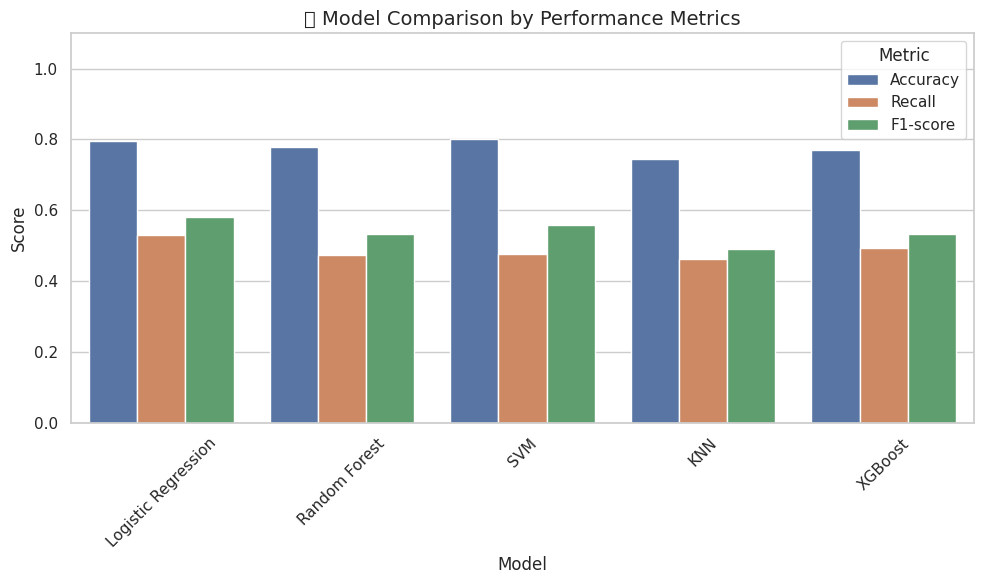

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


scores_df = pd.DataFrame(model_scores).T.reset_index()
scores_df = scores_df.rename(columns={"index": "Model"})
scores_melted = pd.melt(scores_df, id_vars="Model", var_name="Metric", value_name="Score")
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data=scores_melted, x="Model", y="Score", hue="Metric")

plt.title("🔍 Model Comparison by Performance Metrics", fontsize=14)
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout()

plt.show()


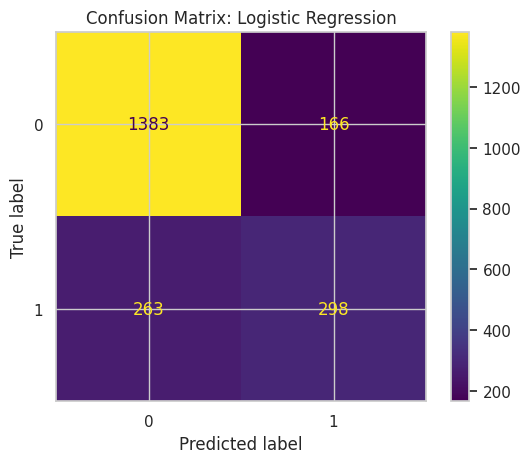

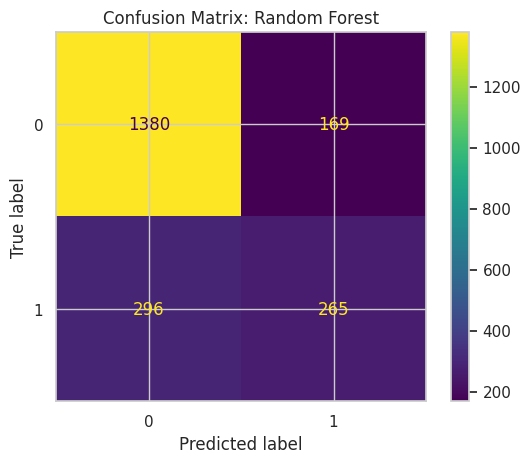

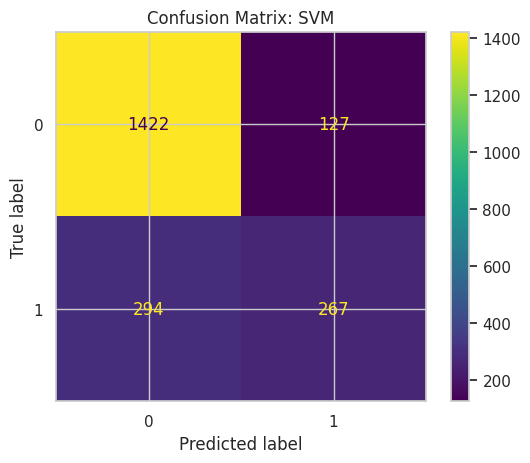

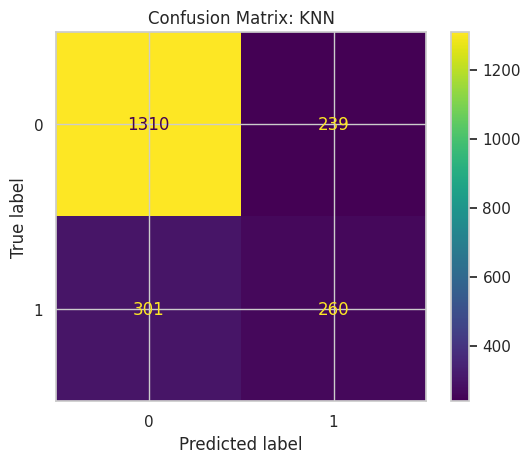

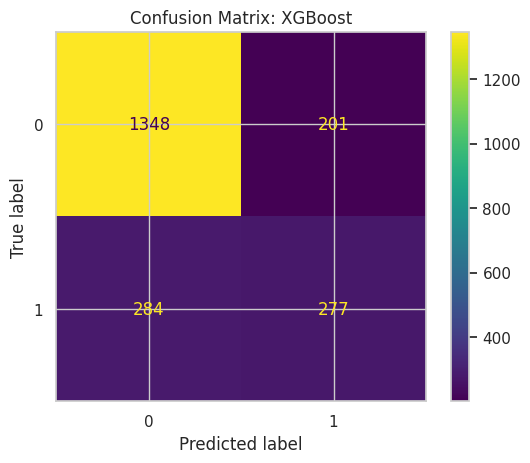

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

for name, model in models.items():
    y_pred = model.predict(X_test)
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    disp.ax_.set_title(f"Confusion Matrix: {name}")
    plt.show()


In [ ]:
print("\n Model Performance Summary:")
for name, scores in model_scores.items():
    print(f"{name} → Accuracy: {scores['Accuracy']:.3f}, Recall: {scores['Recall']:.3f}, F1-score: {scores['F1-score']:.3f}")


 Model Performance Summary:
Logistic Regression → Accuracy: 0.797, Recall: 0.531, F1-score: 0.581
Random Forest → Accuracy: 0.780, Recall: 0.472, F1-score: 0.533
SVM → Accuracy: 0.800, Recall: 0.476, F1-score: 0.559
KNN → Accuracy: 0.744, Recall: 0.463, F1-score: 0.491
XGBoost → Accuracy: 0.770, Recall: 0.494, F1-score: 0.533


In [ ]:
best_model_by_f1 = max(model_scores, key=lambda k: model_scores[k]['F1-score'])
print(f"\n Best model by F1-score is: {best_model_by_f1} with F1 = {model_scores[best_model_by_f1]['F1-score']:.3f}")


 Best model by F1-score is: Logistic Regression with F1 = 0.581


Model SVM does not have predict_proba and will be skipped for ROC curve.


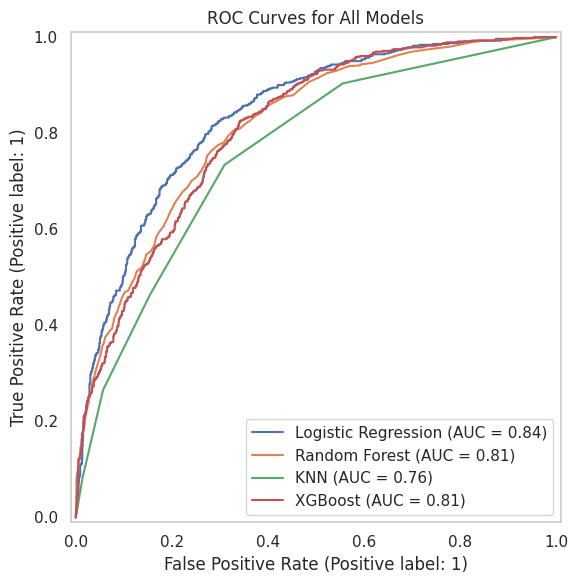

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for name, model in models.items():
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
        RocCurveDisplay.from_predictions(y_test, y_prob, name=name, ax=plt.gca())
    else:
        print(f"Model {name} does not have predict_proba and will be skipped for ROC curve.")

plt.title("ROC Curves for All Models")
plt.grid()
plt.tight_layout()
plt.show()

#hyperparameter tuning (Optuna)

##Optuna (Logistic Regression)

In [ ]:
def objective(trial):
    C = trial.suggest_float('C', 0.001, 10.0, log=True)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])

    if penalty == 'l1' and solver not in ['liblinear', 'saga']:
        raise optuna.exceptions.TrialPruned()
    if penalty == 'l2' and solver not in ['lbfgs', 'liblinear', 'sag', 'saga']:
        raise optuna.exceptions.TrialPruned()

    model = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred)


In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)


[I 2025-06-27 13:25:19,349] A new study created in memory with name: no-name-60dc78cd-e8dc-4d2a-89a8-c422e93c876b
[I 2025-06-27 13:25:19,422] Trial 0 finished with value: 0.5671342685370742 and parameters: {'C': 0.01050539576456306, 'penalty': 'l2', 'solver': 'saga'}. Best is trial 0 with value: 0.5671342685370742.
[I 2025-06-27 13:25:19,452] Trial 1 finished with value: 0.583984375 and parameters: {'C': 0.13674502572189073, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 1 with value: 0.583984375.
[I 2025-06-27 13:25:19,885] Trial 2 finished with value: 0.5814634146341463 and parameters: {'C': 3.5503742071904427, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 1 with value: 0.583984375.
[I 2025-06-27 13:25:21,064] Trial 3 finished with value: 0.5814634146341463 and parameters: {'C': 7.394978095320706, 'penalty': 'l1', 'solver': 'saga'}. Best is trial 1 with value: 0.583984375.
[I 2025-06-27 13:25:21,105] Trial 4 finished with value: 0.5828460038986355 and parameters: {'C

In [ ]:
print("Best hyperparameters:", study.best_params)
print("Best F1-score:", study.best_value)


Best hyperparameters: {'C': 0.0011084894647280566, 'penalty': 'l2', 'solver': 'liblinear'}
Best F1-score: 0.6225490196078431


In [ ]:
best_params = study.best_params

final_model = LogisticRegression(**best_params, max_iter=1000)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("Final Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Final Model Accuracy: 0.781042654028436
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      1549
           1       0.57      0.68      0.62       561

    accuracy                           0.78      2110
   macro avg       0.73      0.75      0.73      2110
weighted avg       0.80      0.78      0.79      2110



##Optuna (XGBoots)

In [ ]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 5.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 5.0),
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }

    model = XGBClassifier(**params)
    f1 = cross_val_score(model, X_train, y_train, scoring=make_scorer(f1_score), cv=3).mean()
    return f1

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2025-06-27 13:25:23,421] A new study created in memory with name: no-name-c8381d41-34d8-4e67-9249-4bb9923d22b6
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-06-27 13:25:24,616] Trial 0 finished with value: 0.5771906752489043 and parameters: {'n_estimators': 347, 'max_depth': 7, 'learning_rate': 0.010003425223181997, 'subsample': 0.9512659463236918, 'colsample_bytree': 0.9318194289988457, 'gamma':

In [ ]:
print("Best trial:")
print("  Value (F1):", study.best_trial.value)
print("  Params:", study.best_trial.params)

Best trial:
  Value (F1): 0.5898363800506257
  Params: {'n_estimators': 459, 'max_depth': 6, 'learning_rate': 0.18249996656461304, 'subsample': 0.7374400769656029, 'colsample_bytree': 0.9979274555517811, 'gamma': 3.0358654362262523, 'reg_alpha': 1.7003059599225816, 'reg_lambda': 3.5672289290252133}


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt
best_xgb_params = study.best_params
best_xgb_params.update({
    'random_state': 42,
    'use_label_encoder': False,
    'eval_metric': 'logloss'
})


tuned_xgb = XGBClassifier(**best_xgb_params)
tuned_xgb.fit(X_train, y_train)

y_pred_xgb = tuned_xgb.predict(X_test)
y_prob_xgb = tuned_xgb.predict_proba(X_test)[:, 1]

print("Final Tuned XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 Final Tuned XGBoost Accuracy: 0.7976303317535545
📝 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.51      0.57       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



#Visualization:

In [ ]:
predictions = final_model.predict(X_test)
probabilities = final_model.predict_proba(X_test)[:, 1]

results_df = X_test.copy()
results_df['Churn_Prob'] = probabilities
results_df['Predicted_Churn'] = predictions
results_df['Actual_Churn'] = y_test.reset_index(drop=True)

high_risk_customers = results_df.sort_values(by='Churn_Prob', ascending=False)
high_risk_customers.head(10)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,KQI_Score,Simulated_Latency,Simulated_PacketLoss,SQM_Score,Churn_Prob,Predicted_Churn,Actual_Churn
1410,-1.009430,2.271039,-0.965608,-0.652305,-1.239504,0.327189,1.116896,0.172835,-0.917837,-1.028998,...,0.399805,1.005086,-0.931987,-1.481110,1.239504,1.005086,-1.724001,0.796070,1,0.0
1976,0.990658,2.271039,-0.965608,-0.652305,-1.280248,0.327189,1.116896,0.172835,-0.917837,-1.028998,...,0.399805,0.992546,-0.966090,-1.485360,1.280248,0.992546,-1.735237,0.793958,1,0.0
6368,0.990658,2.271039,-0.965608,-0.652305,-1.239504,0.327189,1.116896,0.172835,-0.917837,-1.028998,...,0.399805,1.011356,-0.927200,-1.482581,1.239504,1.011356,-1.726507,0.792114,1,NaN
3159,0.990658,2.271039,-0.965608,-0.652305,-1.198760,0.327189,1.116896,0.172835,-0.917837,-1.028998,...,0.399805,1.046886,-0.859235,-1.483726,1.198760,1.046886,-1.724459,0.790932,1,NaN
997,-1.009430,2.271039,-0.965608,-0.652305,-1.158016,0.327189,1.116896,0.172835,-0.917837,-1.028998,...,0.399805,1.023896,-0.820102,-1.471138,1.158016,1.023896,-1.699024,0.790813,1,1.0
585,-1.009430,2.271039,-0.965608,-0.652305,-1.280248,0.327189,1.116896,0.172835,-0.917837,-1.028998,...,0.399805,0.679046,-0.969554,-1.411798,1.280248,0.679046,-1.609953,0.775332,1,0.0
5783,-1.009430,2.271039,-0.965608,-0.652305,-1.280248,0.327189,-0.991564,0.172835,-0.917837,-1.028998,...,0.399805,0.825346,-0.967965,-1.446127,1.280248,0.825346,-1.668419,0.770818,1,NaN
1564,0.990658,2.271039,-0.965608,-0.652305,-0.913552,0.327189,1.116896,0.172835,-0.917837,-1.028998,...,0.399805,1.067787,-0.611023,-1.438280,0.913552,1.067787,-1.619079,0.770699,1,0.0
3346,-1.009430,2.271039,-0.965608,-0.652305,-1.239504,0.327189,1.116896,0.172835,-0.917837,-1.028998,...,0.399805,0.610076,-0.925281,-1.388421,1.239504,0.610076,-1.566143,0.767063,1,NaN
2577,-1.009430,-0.440327,-0.965608,-0.652305,-1.280248,0.327189,1.116896,0.172835,-0.917837,-1.028998,...,0.399805,1.036436,-0.965627,-1.495659,1.280248,1.036436,-1.752777,0.766277,1,NaN


/tmp/ipython-input-625-3981106656.py:9: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


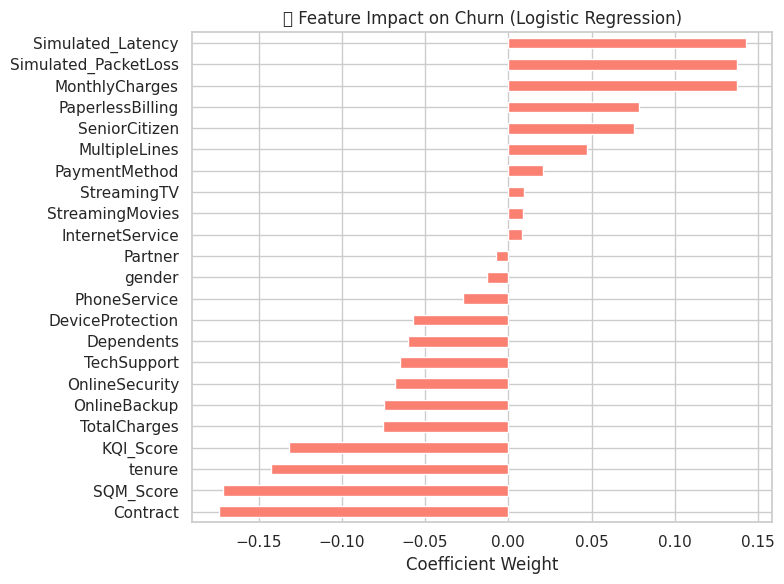

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

importance = pd.Series(final_model.coef_[0], index=X_train.columns)
importance.sort_values().plot(kind='barh', figsize=(8, 6), color='salmon')
plt.title("📌 Feature Impact on Churn (Logistic Regression)")
plt.xlabel("Coefficient Weight")
plt.tight_layout()
plt.show()


In [ ]:

high_risk = results_df[results_df['Churn_Prob'] > 0.7]
insight = high_risk.mean(numeric_only=True)
print(insight)


gender                 -0.115774
SeniorCitizen           1.232643
Partner                -0.561105
Dependents             -0.629057
tenure                 -1.116405
PhoneService            0.327189
MultipleLines           0.399122
InternetService         0.172835
OnlineSecurity         -0.917837
OnlineBackup           -0.811478
DeviceProtection       -0.688541
TechSupport            -0.924267
StreamingTV             0.233346
StreamingMovies         0.296423
Contract               -0.826735
PaperlessBilling        0.655722
PaymentMethod           0.349974
MonthlyCharges          0.724537
TotalCharges           -0.807001
KQI_Score              -1.393548
Simulated_Latency       1.116405
Simulated_PacketLoss    0.724537
SQM_Score              -1.562798
Churn_Prob              0.731600
Predicted_Churn         1.000000
Actual_Churn            0.323529
dtype: float64


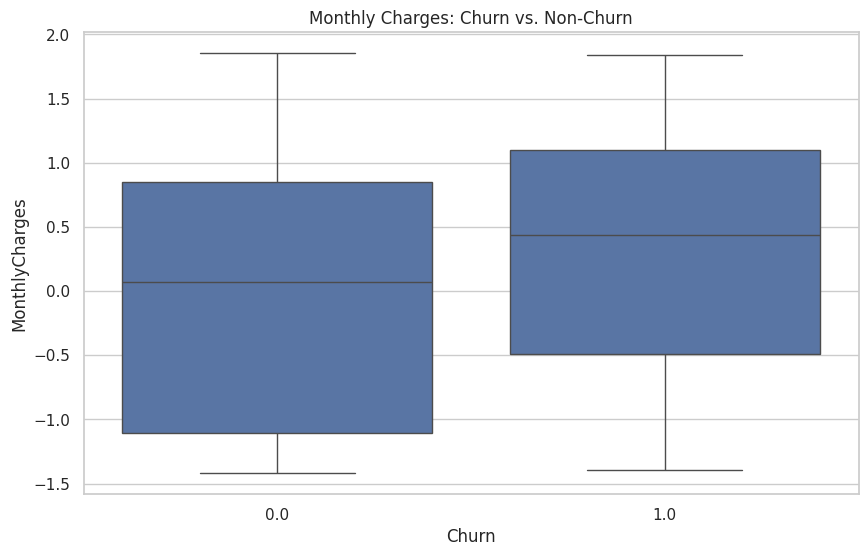

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

full_df = X_test.copy()
full_df['Churn'] = y_test.reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.boxplot(data=full_df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges: Churn vs. Non-Churn")
plt.show()


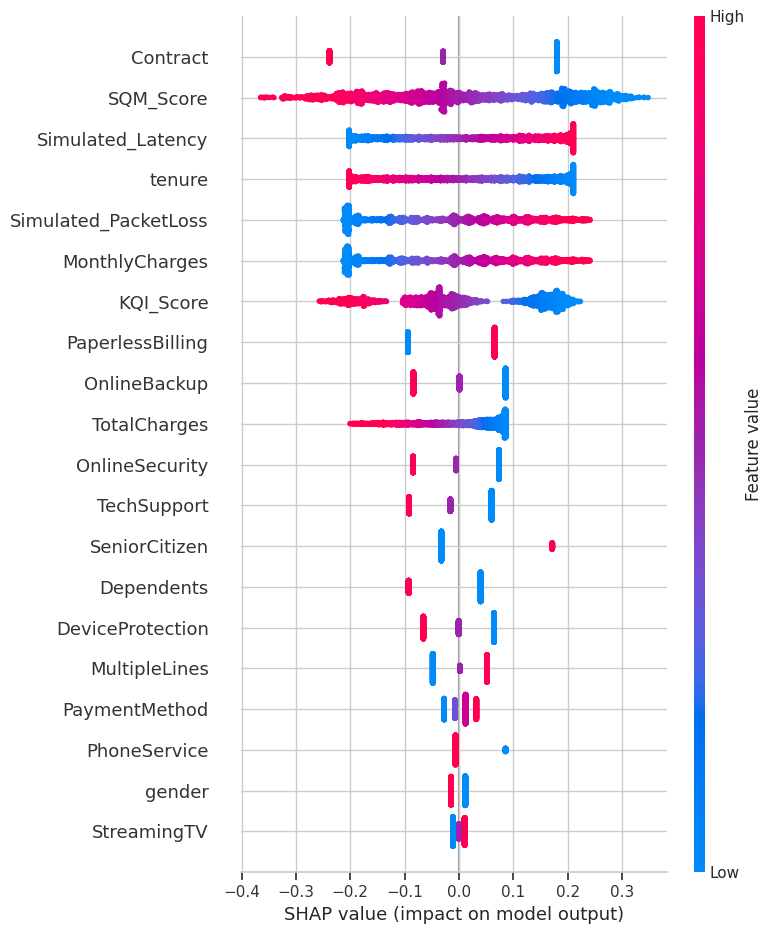

In [ ]:
import shap

explainer = shap.Explainer(final_model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)


#Key Insights from Churn Analysis

##Customer Experience Heatmap (SmartCare-style KQI Dashboard)

/tmp/ipython-input-629-2125523348.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


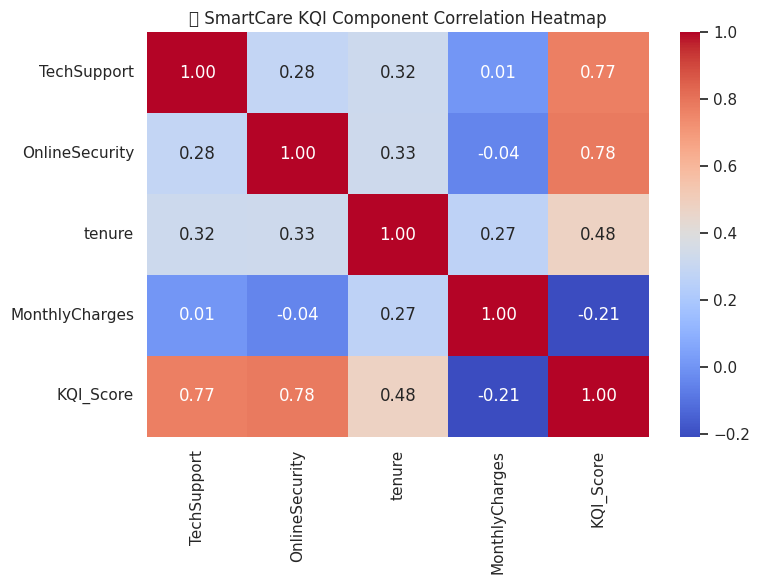

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

kqi_components = ['TechSupport', 'OnlineSecurity', 'tenure', 'MonthlyCharges']
plt.figure(figsize=(8, 6))
sns.heatmap(df[kqi_components + ['KQI_Score']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("SmartCare KQI Component Correlation Heatmap")
plt.tight_layout()
plt.show()


##SmartCare NPM View: Latency vs. Churn Risk

/tmp/ipython-input-630-2282208149.py:7: UserWarning: Glyph 128246 (\N{ANTENNA WITH BARS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128246 (\N{ANTENNA WITH BARS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


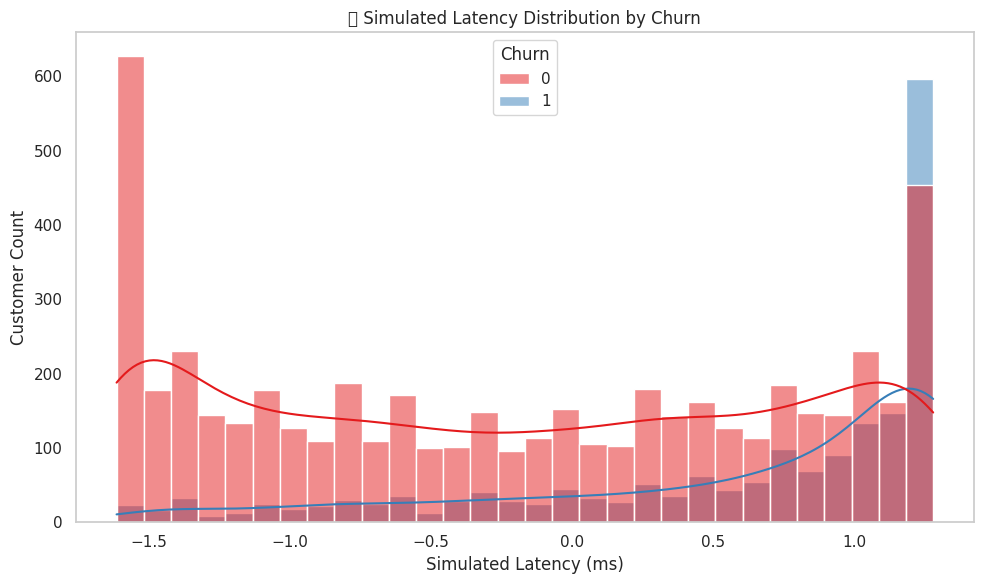

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Simulated_Latency', hue='Churn', bins=30, kde=True, palette='Set1')
plt.title("Simulated Latency Distribution by Churn")
plt.xlabel("Simulated Latency (ms)")
plt.ylabel("Customer Count")
plt.grid()
plt.tight_layout()
plt.show()


##SQM Score vs. Churn Probability (SmartCare Risk View)

/tmp/ipython-input-631-309401067.py:7: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


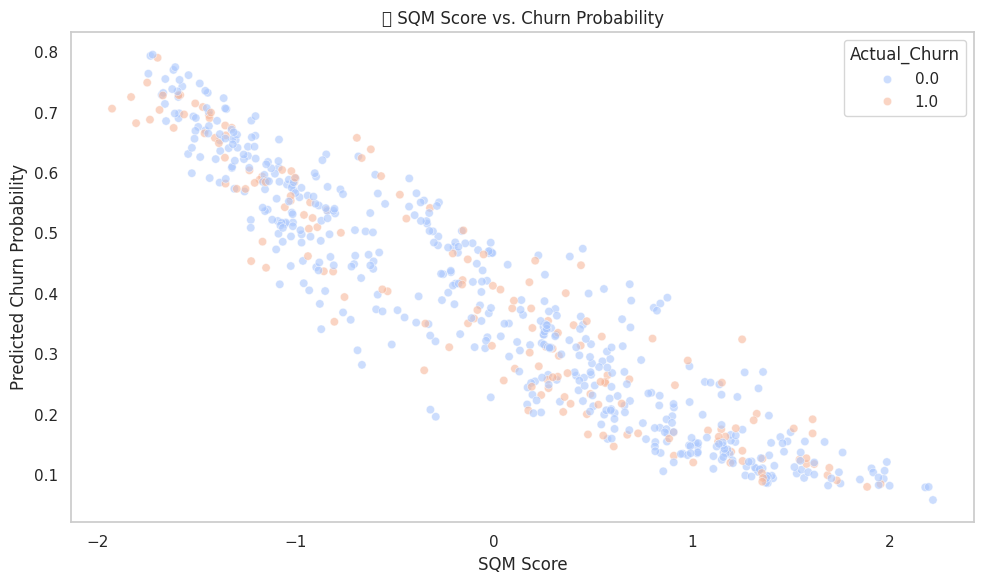

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='SQM_Score', y='Churn_Prob', hue='Actual_Churn', palette='coolwarm', alpha=0.6)
plt.title("SQM Score vs. Churn Probability")
plt.xlabel("SQM Score")
plt.ylabel("Predicted Churn Probability")
plt.grid()
plt.tight_layout()
plt.show()

##s

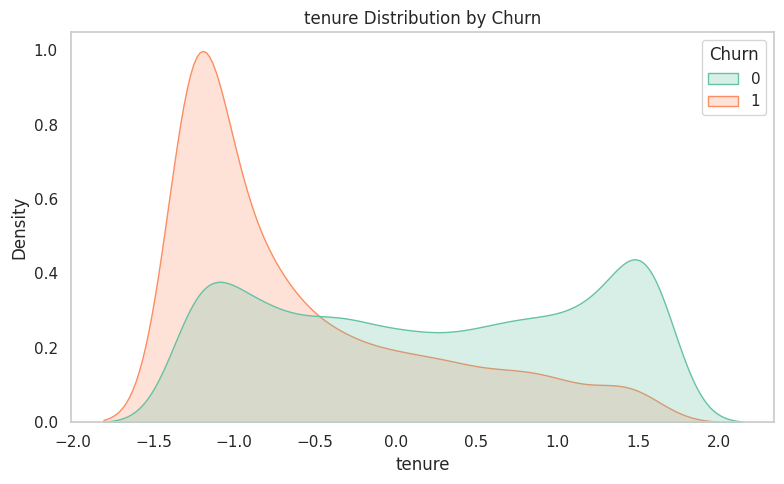

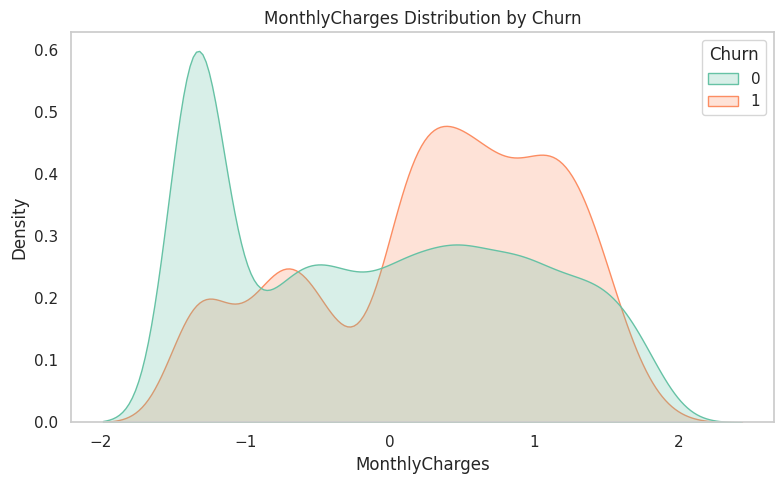

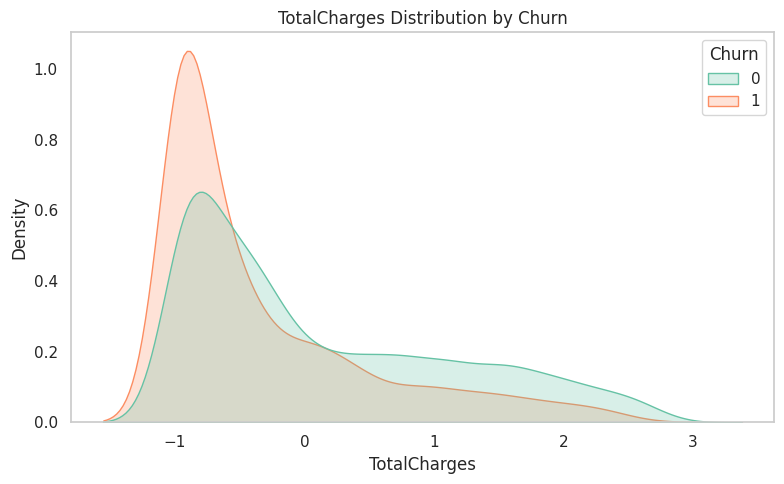

In [ ]:
import seaborn as sns

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df, x=col, hue='Churn', fill=True, common_norm=False, palette='Set2')
    plt.title(f"{col} Distribution by Churn")
    plt.grid()
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-635-1691598240.py:9: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


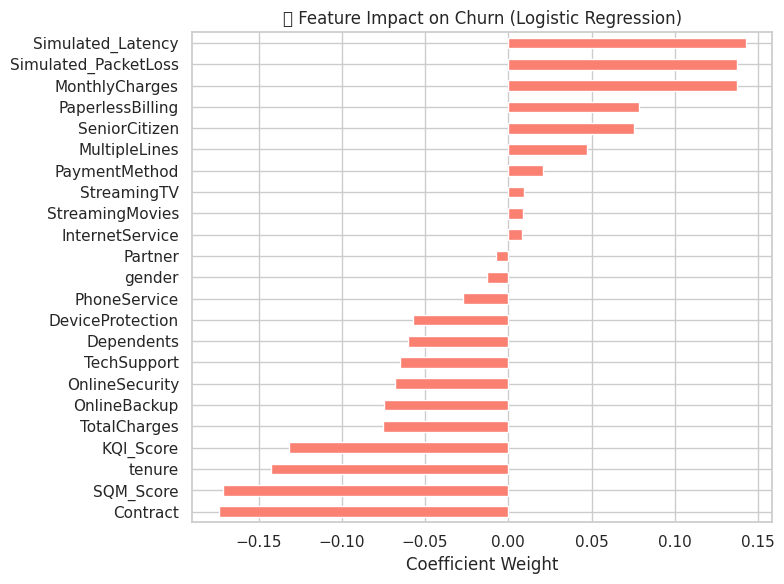

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming final_model is your trained Logistic Regression
coefs = pd.Series(final_model.coef_[0], index=X_train.columns)
coefs.sort_values().plot(kind='barh', figsize=(8, 6), color='salmon')
plt.title("🔍 Feature Impact on Churn (Logistic Regression)")
plt.xlabel("Coefficient Weight")
plt.tight_layout()
plt.show()


##1. Churn Rate by Contract Type

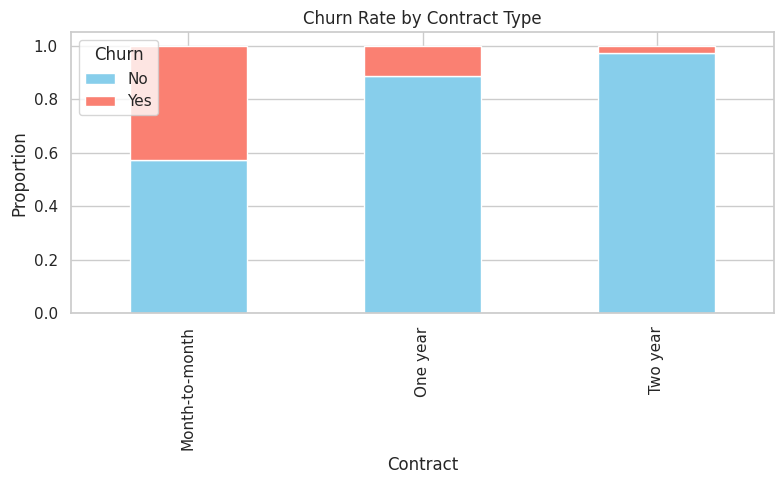

In [ ]:
contract_churn = df_raw.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().fillna(0)
contract_churn.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(8, 5))
plt.title("Churn Rate by Contract Type")
plt.ylabel("Proportion")
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


##2. Tenure Distribution by Churn

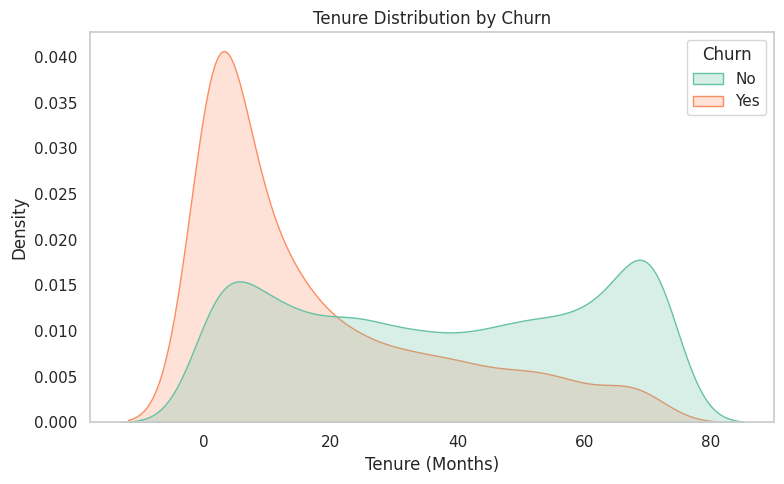

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df_raw, x='tenure', hue='Churn', fill=True, common_norm=False, palette='Set2')
plt.title("Tenure Distribution by Churn")
plt.xlabel("Tenure (Months)")
plt.grid()
plt.tight_layout()
plt.show()


##3. Monthly Charges vs. Churn

/tmp/ipython-input-639-2214467373.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_raw, x='Churn', y='MonthlyCharges', palette='coolwarm')


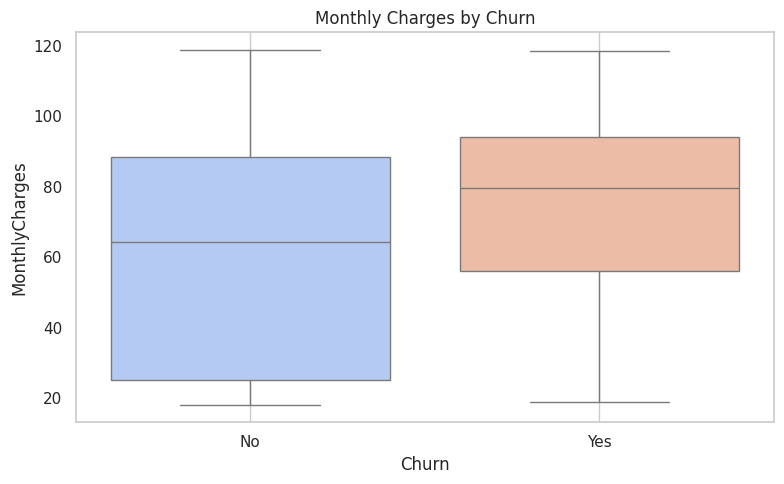

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_raw, x='Churn', y='MonthlyCharges', palette='coolwarm')
plt.title("Monthly Charges by Churn")
plt.grid()
plt.tight_layout()
plt.show()


##4. Churn Rate by Payment Method

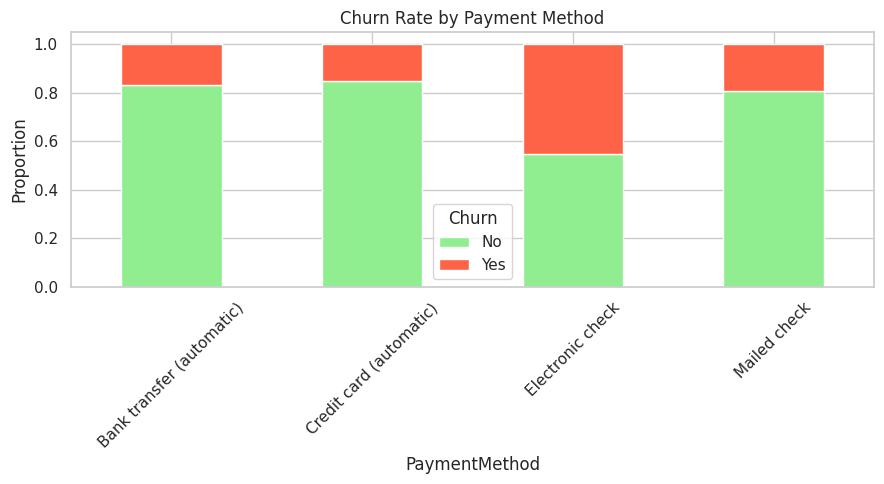

In [ ]:
payment_churn = df_raw.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack().fillna(0)
payment_churn.plot(kind='bar', stacked=True, figsize=(9, 5), color=['lightgreen', 'tomato'])
plt.title("Churn Rate by Payment Method")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


##5. Internet Service Type vs. Churn

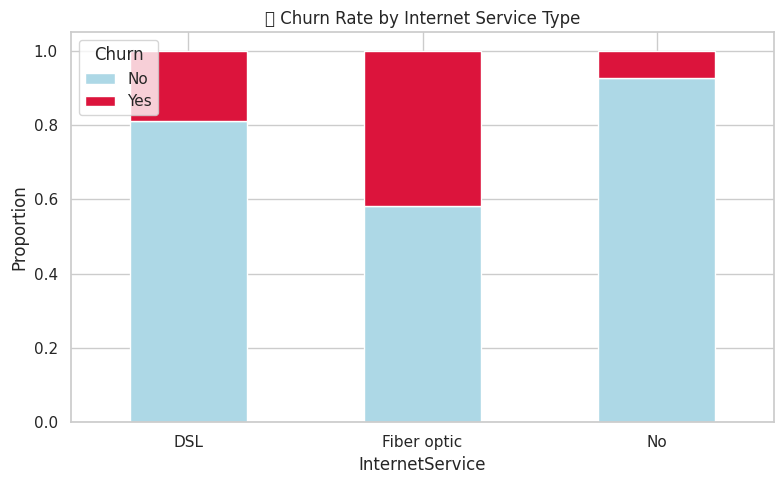

In [ ]:
internet_churn = df_raw.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack().fillna(0)
internet_churn.plot(kind='bar', stacked=True, figsize=(8, 5), color=['lightblue', 'crimson'])
plt.title("Churn Rate by Internet Service Type")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


##6. Churn by Senior Citizen Status

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128116 (\N{OLDER MAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


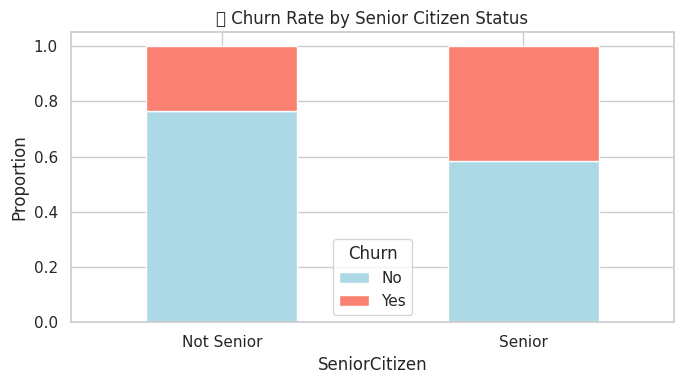

In [ ]:
senior_churn = df_raw.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack().fillna(0)
senior_churn.plot(kind='bar', stacked=True, figsize=(7, 4), color=['lightblue', 'salmon'])
plt.title("Churn Rate by Senior Citizen Status")
plt.ylabel("Proportion")
plt.xticks([0, 1], ['Not Senior', 'Senior'], rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


##7. Partner & Dependents Impact

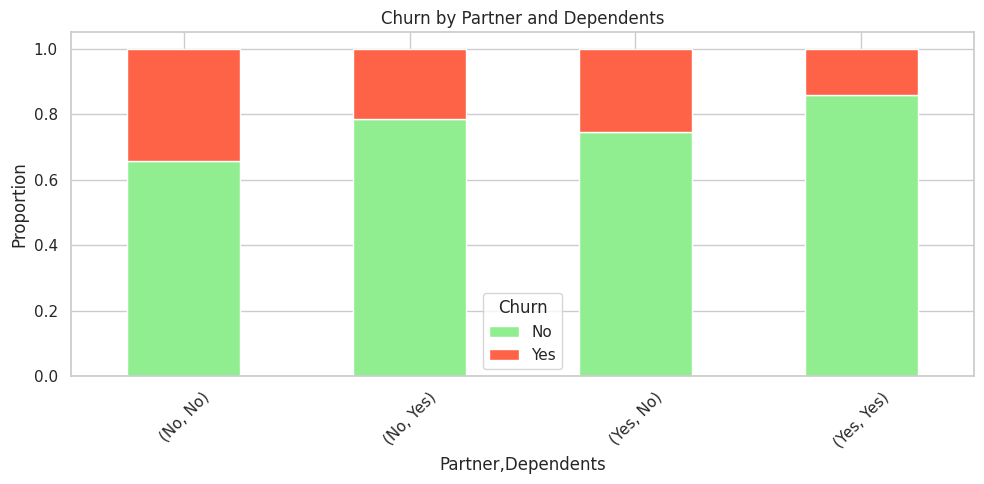

In [ ]:
partner_dependents = df_raw.groupby(['Partner', 'Dependents'])['Churn'].value_counts(normalize=True).unstack().fillna(0)
partner_dependents.plot(kind='bar', stacked=True, figsize=(10, 5), color=['lightgreen', 'tomato'])
plt.title("Churn by Partner and Dependents")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


##8. Streaming Services vs. Churn

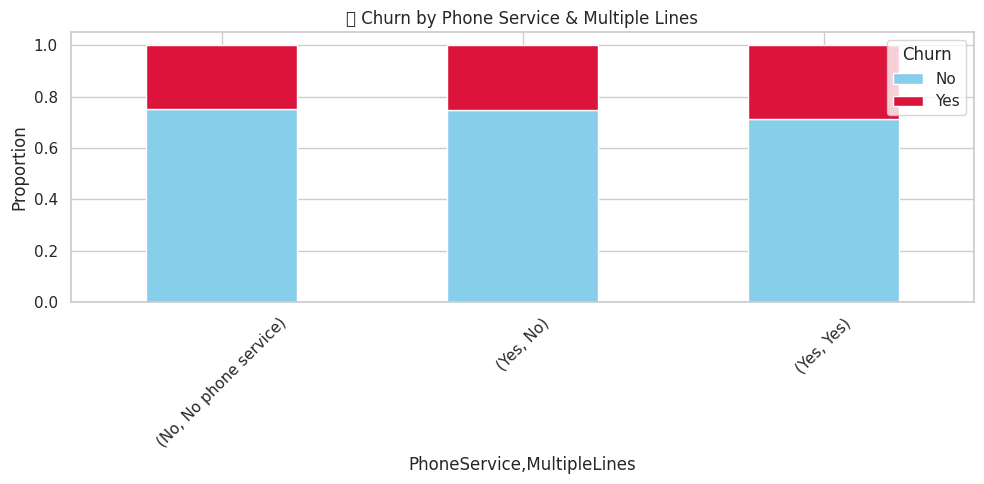

In [ ]:
phone_churn = df_raw.groupby(['PhoneService', 'MultipleLines'])['Churn'].value_counts(normalize=True).unstack().fillna(0)
phone_churn.plot(kind='bar', stacked=True, figsize=(10, 5), color=['skyblue', 'crimson'])
plt.title("Churn by Phone Service & Multiple Lines")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()
